### Ejercicio 3. Método de Simpson

In [1]:
#Creamos la función simpson(f,a,b,e), donde f es la función dada, a y b son los extremos de integración y e es la longitud deseada para los subintervalos
function simpson(f,a,b,e)
    #Si e es la longitud deseada para los subintervalos, entonces el número de subintervalos será (b-a)/e para asegurar que sea entero usamos round() (como se muestra abajo), pero entonces el número de elementos en nuestra partición tiene que ser el número anterior más uno, de esta forma definimos h
    h=1+round((b-a)/e)
   #Definimos la lista de h elementos de "a" a "b" 
    list=linspace(a,b,h)
    #Definimos nuestro valor inicial
    int=0
    #El for es para ir sumando la contribución de cada intervalo a la integral
    for i in 2:length(list)
        #A int le vamos sumando el área debajo de cada parábola.
        
        int=int+((list[i]-list[i-1])/6)*(f(list[i-1])+4*f((list[i]+list[i-1])/2)+f(list[i]))
        
    end
        
    #La función regresa el valor de la integral
    return int    
end;

Ejemplos.

Consideremos las funciones $f(x)=x^5$ y $g(x)=e^{-3x}$

In [2]:
#Definimos las funciones
f(x)=x^5;
g(x)=e^(-3x);

In [3]:
#Probamos el método para f

simpson(f,-4,10,0.00004)

165983.9999999998

In [4]:
#Probamos el método para g

simpson(g,-3,5,0.0001)

2701.027975756533

### Ejercicio 4.  Interpolación de Lagrange

In [5]:
Pkg.add("SymPy");

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [47]:
using SymPy;

In [48]:
#Definimos la función lagrange(f,x,y), cuyos argumentos son: f, la función; x la lista de las abscisas; y y, la lista de las correspondientes ordenadas.
function lagrange(X,Y,x)
    #Definimos nuestra variable simbólica z
    z=Sym("z");
    #Vamos a ir guardando cada término en el polinomio pol, que definimos como 0 al inicio
    pol=0
    #El siguiente for es para ir tomando
    for j in 1:length(Y)
        l=1*z/z
        for m in 1:length(X)
            if j!=m
               l=l*(z-X[m])/(X[j]-X[m])
            end
        end
        pol=pol+Y[j]*l
    end
    pol=simplify(pol)
    L=lambdify(pol,[z])
    return L(x)
end;

#### Interpolación de cos(x)

In [49]:
A=linspace(0,2pi,10);

In [50]:
B=cos.(A);

In [51]:
lagrange(A,B,Sym("x"))

                     9                        8                         7     
5.6920614055489e-18*x  - 1.97979336359535e-5*x  + 0.000497576342935013*x  - 0.

                   6                        5                       4         
00411366974808214*x  + 0.00878850466172487*x  + 0.0243778891541915*x  + 0.0201

              3                      2                            
425548285172*x  - 0.512543349763835*x  + 0.003132547207505*x + 1.0

In [52]:
interpcos(x)=lagrange(A,B,x);

In [39]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [53]:
using PyPlot

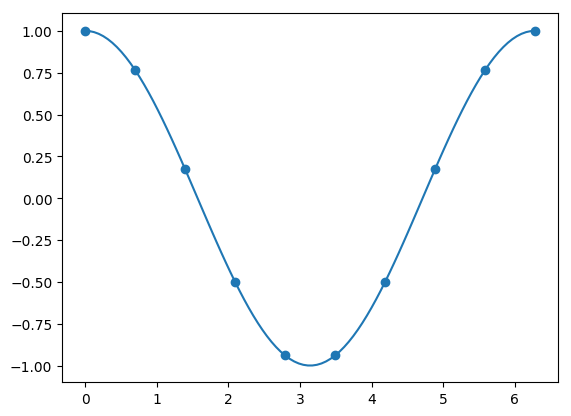

In [55]:
scatter(A,B)
a=linspace(0,2pi,100)
b=interpcos.(a)
plot(a,b)
show();